In [49]:
import math
import random 
from random import randint
import matplotlib.pyplot as plt
import numpy as np

def SimulatedAnnealing(cost_func, boundary, iter):
  Lboundary = boundary[0]
  Uboundary = boundary[1]
  maxtemp =75
  mintemp =35
  const = 0.5
  currentsolution = randint(Lboundary,Uboundary)
  evalsolution = cost_func(currentsolution)
  solutions = list()
  temp = maxtemp
  i=0

  print('Iteration no:  functinparam: value ')
  while temp >mintemp and i <iter:
    candidatesol = currentsolution + random.normalvariate(0,1)
    evalcandidate = cost_func(candidatesol)
    cost= evalsolution - evalcandidate

    if cost >=0 or random.uniform(0,1)<math.exp(-cost/temp):
      currentsolution , evalsolution = candidatesol, evalcandidate
      solutions.append(currentsolution)
      
    print(i,currentsolution,evalsolution)

    temp -= const
    i+=1 

  return currentsolution, evalsolution, solutions


def plotting(objective, boundary,sol):
  x= np.linspace(*boundary,100)
  y= objective(x)
  plt.figure(figsize = (10,7))
  plt.plot(x,y, label ="functional curve")
  plt.plot(sol, [objective(val) for val in sol],'o', label = 'Simulated Annealing')
  plt.legend()
  plt.show()

def cost_func(x):
  return x**2 + 9

Iteration no:  functinparam: value 
0 7.5675878047583565 66.2683851827274
1 7.4446405807425045 64.4226733764381
2 7.071064719945341 58.99995627365569
3 7.761547687944856 69.24162251224215
4 8.981440469187735 89.6662729015632
5 9.023076258378504 90.41590516451383
6 9.705398116858406 103.1947526067187
7 8.159460862729077 75.57680157040753
8 6.159907802184286 46.94446413141084
9 6.74770737151922 54.53155477165482
10 7.07816387347846 59.1004038198156
11 6.346869056143048 49.28274681582615
12 8.15233969320421 75.46064247339291
13 7.995974446940465 72.93560735612488
14 7.74607862873018 69.00173412247042
15 8.301804310493734 77.91995480973235
16 7.642600522121273 67.40934274072836
17 8.361622210840723 78.91672599682491
18 7.750915879380001 69.07669696922505
19 5.154188437240739 35.565658446586134
20 4.630667490512834 30.443081407692425
21 4.3036420949759755 27.521335281649204
22 5.120622252607591 35.22077225390004
23 5.987588995793838 44.851221982551465
24 5.5253436900387465 39.52942289305099

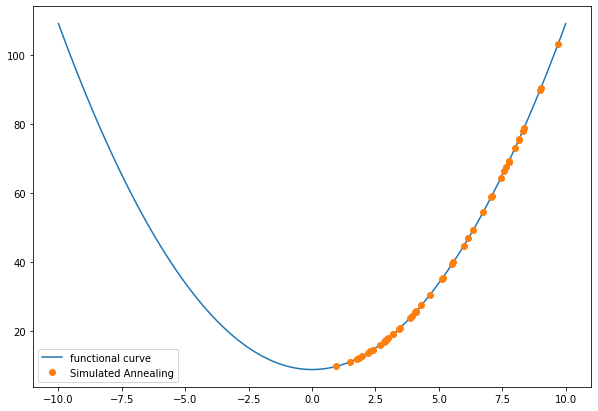

In [52]:
boundary = [-10, 10]
iter =50
best, value, sol = SimulatedAnnealing(cost_func, boundary,iter)
plotting(cost_func, boundary,sol)